# Displaying point sets (3-D)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import cvxopt
from cvxopt import matrix, printing


In [4]:
def get_translation_matrix(tx: float = 0, ty: float = 0, tz: float = 0) -> np.ndarray:
    """ construct a scaling matrix.
    input
        tx: x-translation (float)
        ty: y-translation (float)
        tz: z-translation (float)
    output
        4x4 rotation matrix  (3-D translation in homogeneous coordinates)
    """

    T = np.array([[1, 0,  0, tx],
                  [0, 1,  0, ty],
                  [0, 0,  1, tz],
                  [0, 0,  0, 1]])
        
    return T


In [5]:
def get_scaling_matrix(sx: float = 1, sy: float = 1, sz: float = 1) -> np.ndarray:
    """ construct a scaling matrix.
    input
        sx: scaling factor for x dimension(float)
        sy: scaling factor for y dimension(float)
        sz: scaling factor for z dimension(float)
    output
        4x4 rotation matrix  (3-D rotation in homogeneous coordinates)
    """

    S = np.array([[sx, 0,  0,  0],
                  [0, sy,  0,  0],
                  [0,  0, sz,  0],
                  [0,  0,  0,  1]])
        
    return S


In [6]:
def get_rotation_matrix(angle: float, axis_name = None) -> np.ndarray:
    """ calculate single rotation of $theta$ matrix around x,y or z
        code adapted from: https://programming-surgeon.com/en/euler-angle-python-en/
    input
        angle = rotation angle in degrees
        axis_name = 'x', 'y' or 'z'
    output
        4x4 rotation matrix
    """    

    # Convert angle from degrees to radians.
    theta = angle * np.pi / 180    

    # Pre-calculate the cosine and sine values 
    c = np.cos(theta)
    s = np.sin(theta)

    # Select the correct rotation matrix for each axis: x, y, or z. 
    if axis_name == 'x':
        rotation_matrix = np.array([[1, 0,  0, 0],
                                    [0, c, -s, 0],
                                    [0, s,  c, 0],
                                    [0, 0,  0, 1]])
    if axis_name == 'y':
        rotation_matrix = np.array([[ c,  0, s, 0],
                                    [ 0,  1, 0, 0],
                                    [-s,  0, c, 0],
                                    [ 0,  0, 0, 1]])
    elif axis_name == 'z':
        rotation_matrix = np.array([[c, -s, 0, 0],
                                    [s,  c, 0, 0],
                                    [0,  0, 1, 0],
                                    [0,  0, 0, 1]])
    elif axis_name == None: 
        rotation_matrix = np.eye(4)    # Identity matrix 
        
    return rotation_matrix
    

In [7]:
def visualize3D(X: np.ndarray, 
                Y: np.ndarray, 
                ax):
    """
    Plots two pointsets using scatter plot. Its goal is to show the
    difference between the original shape and its transformed
    version.

    Parameters
    ----------
    X: numpy.ndarray, shape=(3, N)
        3 x N array containing the (x,y,z) coordinates of the shape 

    Y: numpy.ndarray, shape=(3, N)
        3 x N array containing the (x,y,z) coordinates of the other shape

    Returns
    -------
    Nothing.

    """
    
    plt.cla()
    ax.scatter(X[0, :],  X[1, :], X[2, :], color='blue', label='Original')
    ax.scatter(Y[0, :],  Y[1, :], Y[2, :], color='red', label='Transformed')
    ax.legend(loc='upper left', fontsize='x-large')
    ax.grid(False)
    ax.set_xlabel('x') 
    ax.set_ylabel('y') 
    ax.set_zlabel('z') 
    plt.draw()

In [8]:
def homogeneous2cartesian(X_h: np.ndarray) -> np.ndarray:
    """Converts the coordinates of a set of 3-D points from 
    homogeneous coordinates to Cartesian coordinates. 

    Args:
      X_h: MxN np.ndarray (float) containing N points in homogeneous coords.  
           Each point is a column of the matrix.

    Returns:
      X_c: (M-1)xN np.ndarray (float) in Cartesian coords. 
           Each point is a column of the matrix.
      
    """    

    # Number of rows (dimension of points). 
    nrows = X_h.shape[0]
    
    # Divide each coordinate by the last to convert point set from homogeneous to Cartesian 
    # (using vectorized calculation for speed and concise code)
    X_c = X_h[0:nrows-1,:] / X_h[-1,:]

    return X_c



In [9]:
def cartesian2homogeneous(X_c: np.ndarray) -> np.ndarray:
    """Converts the coordinates of a set of 3-D points from 
    Cartesian coordinates to homogeneous coordinates. 

    Args:
      X_c: M x N np.ndarray (float). It contains N points in M-dimensional space. 
           Each point is a column of the matrix.

    Returns:
      X_h: (M+1) x N np.ndarray (float) in homogeneous coords. It contains N points in (M+1)-dimensional space. 
           Each point is a column of the matrix.
      
    """    

    # Number of columns (number of points in the set). 
    ncols = X_c.shape[1]

    
    
    # Add an extra row of 1s in the matrix. 
    X_h = np.block([[X_c],
                   [ np.ones((1, ncols))]])

    return X_h

In [10]:
# Load points from file
X = np.loadtxt('bunny.txt')
# X = np.loadtxt('chopper.txt')
X.shape

(453, 3)

In [11]:
printing.options['dformat'] = '%.2f'
printing.options['width'] = -1
print('X = ')
print(matrix(X[0:5][:]))

X = 
[-0.03  0.13  0.01]
[-0.04  0.13  0.01]
[-0.07  0.14  0.04]
[-0.01  0.13  0.02]
[-0.02  0.13  0.01]



In [12]:
# Transpose so points are columns in the data matrix 
Xt = X.transpose()
Xt.shape

(3, 453)

In [13]:
# Print the first few columns of the data matrix 
print('Xt = ')
print(matrix(Xt[:,0:5]))

Xt = 
[-0.03 -0.04 -0.07 -0.01 -0.02]
[ 0.13  0.13  0.14  0.13  0.13]
[ 0.01  0.01  0.04  0.02  0.01]



In [14]:
printing.options['dformat'] = '%.2f'
printing.options['width'] = -1


# Scaling
S = get_scaling_matrix(1.2, 1.5, -1.2)
print('\n')
print('Scaling')
print('--------------------------------')
print('S = ')
print(matrix(S))

# Rotation
R = get_rotation_matrix(90, axis_name = 'x')     # Rotation 
print('\n')
print('Rotation')
print('--------------------------------')
print('R = ')
print(matrix(R))

# Translation
T = get_translation_matrix(0.1, 0.2, -0.1)
print('\n')
print('Translation')
print('--------------------------------')
print('T = ')
print(matrix(T))



Scaling
--------------------------------
S = 
[ 1.20  0.00  0.00  0.00]
[ 0.00  1.50  0.00  0.00]
[ 0.00  0.00 -1.20  0.00]
[ 0.00  0.00  0.00  1.00]



Rotation
--------------------------------
R = 
[ 1.00  0.00  0.00  0.00]
[ 0.00  0.00 -1.00  0.00]
[ 0.00  1.00  0.00  0.00]
[ 0.00  0.00  0.00  1.00]



Translation
--------------------------------
T = 
[ 1.00  0.00  0.00  0.10]
[ 0.00  1.00  0.00  0.20]
[ 0.00  0.00  1.00 -0.10]
[ 0.00  0.00  0.00  1.00]



In [15]:
np.set_printoptions(precision=2)
T

array([[ 1. ,  0. ,  0. ,  0.1],
       [ 0. ,  1. ,  0. ,  0.2],
       [ 0. ,  0. ,  1. , -0.1],
       [ 0. ,  0. ,  0. ,  1. ]])

In [16]:
def apply_transformation(X, H): 
    """transforms object using a compound transformation

    Args:
      X: 3 x N np.ndarray (float). It contains N points in 3-dimensional space 
                  in Cartesian coordinates. Each point is a column of the matrix.

      H: 4x4 Transformation matrix in homogeneous coordinates to be applied to the point set.     

    Returns:
      Y:  3 x N np.ndarray (float). It contains N points in 3-dimensional space 
                      in Cartesian coordinates. Each point is a column of the matrix.
      
    """    

    
    # Convert points to Homogeneous coords before transforming them
    Xh = cartesian2homogeneous(X)
    
    # Apply transformation 
    Yh = H @ Xh

    # Convert points back to Cartesian coords before plotting
    Y = homogeneous2cartesian(Yh)

    
    return Y

    

In [23]:
# Rotation, Translation, and Scale (in this order)
T1 = S @ T @ R

Y1 = apply_transformation(Xt, T1)

print('T1 = ')
print(matrix(T1))


print('Y1 = ')
print(matrix(Y1[:,0:5]))

np.sum(Y1[:,0:5])

T1 = 
[ 1.20  0.00  0.00  0.12]
[ 0.00  0.00 -1.50  0.30]
[ 0.00 -1.20 -0.00  0.12]
[ 0.00  0.00  0.00  1.00]

Y1 = 
[ 0.08  0.07  0.04  0.11  0.10]
[ 0.29  0.29  0.24  0.27  0.29]
[-0.03 -0.04 -0.05 -0.04 -0.03]



1.593428762862459

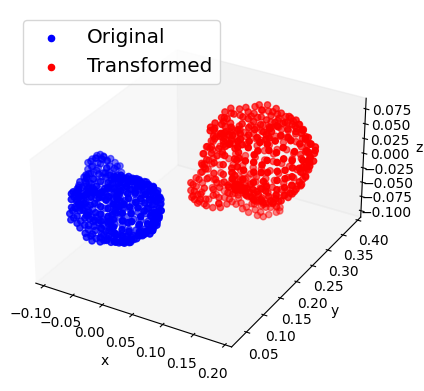

In [18]:
# Uncomment this line to get an interactive plot
# %matplotlib tk  

# Plot will show inline but non-interactive
#%matplotlib inline 

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
visualize3D(Xt, Y1, ax=ax)
ax.set_aspect("equal")
plt.show(block=False)

In [24]:
# Translation, Rotation, and Scaling (in this order)
T2 = S @ R @ T 

Y2 = apply_transformation(Xt, T2)

print('T2 = ')
print(matrix(T2))

print('Y2 = ')
print(matrix(Y2[:,0:5]))

np.sum(Y2[:,0:5])

T2 = 
[ 1.20  0.00  0.00  0.12]
[ 0.00  0.00 -1.50  0.15]
[ 0.00 -1.20 -0.00 -0.24]
[ 0.00  0.00  0.00  1.00]

Y2 = 
[ 0.08  0.07  0.04  0.11  0.10]
[ 0.14  0.14  0.09  0.12  0.14]
[-0.39 -0.40 -0.41 -0.40 -0.39]



-0.9565712371375411

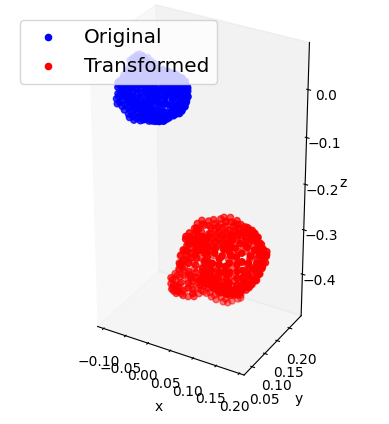

In [20]:
# Uncomment this line to get an interactive plot
# %matplotlib tk  

# Plot will show inline but non-interactive
#%matplotlib inline 

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
visualize3D(Xt, Y2, ax=ax)
ax.set_aspect("equal")
plt.show(block=False)

In [25]:
# Scaling, Translation, and Rotation (in this order)
T3 = R @ T @ S

Y3 = apply_transformation(Xt, T3)

print('T3 = ')
print(matrix(T3))

print('Y3 = ')
print(matrix(Y3[:,0:5]))

np.sum(Y3[:,0:5])

T3 = 
[ 1.20  0.00  0.00  0.10]
[ 0.00  0.00  1.20  0.10]
[ 0.00  1.50 -0.00  0.20]
[ 0.00  0.00  0.00  1.00]

Y3 = 
[0.06 0.05 0.02 0.09 0.08]
[0.11 0.11 0.15 0.12 0.11]
[0.39 0.40 0.42 0.40 0.39]



2.8799194226041442

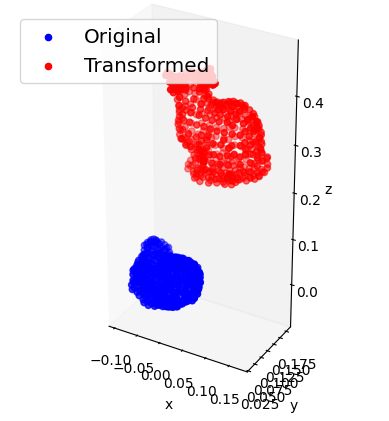

In [22]:
# Uncomment this line to get an interactive plot
# %matplotlib tk  

# Plot will show inline but non-interactive
#%matplotlib inline 


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
visualize3D(Xt, Y3, ax=ax)
ax.set_aspect("equal")


plt.show(block=False)